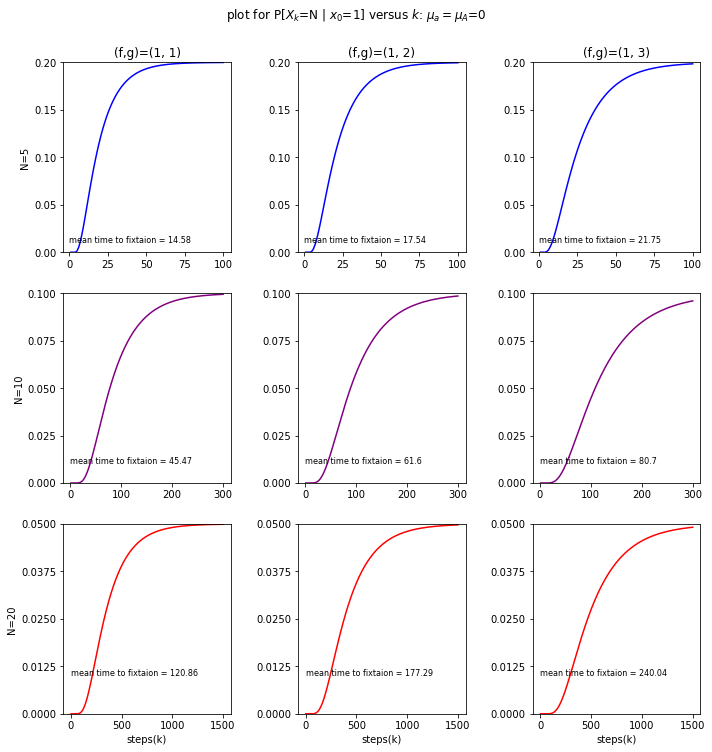

run time=1.09 sec.


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import matrix_power
from termcolor import colored
import timeit


start = timeit.default_timer()

# transition probability matrix for Moran model with selection
def transition_matrix(N, mu_a, mu_A, f, g):
    
    P = np.zeros((N+1,N+1))   
    
    for j in range(1,N):
        sa = f*j/(f*j + g*(N-j))
        sA = g*(N-j)/(f*j + g*(N-j))
        P[j][j+1] = (sa*(1-mu_a) + (sA*mu_A))*sA
        P[j][j-1] = (sa*mu_a + sA*(1-mu_A))*sa
        P[j][j] = 1-P[j][j+1]-P[j][j-1]
    P[0][1] = mu_A    
    P[N][N-1] = mu_a  
    P[0][0] = 1-P[0][1]
    P[N][N] = 1-P[N][N-1]
    
    return P

    
# probability of fixation to state N, starting at x0. We must have: mu_a=mu_A=0
def fixation_prob(N, f, g, x0, n):
    
    P = transition_matrix(N, 0, 0, f, g)
    estimate_prob = matrix_power(P,n)[x0][N] 

    return estimate_prob

    
# mean-time to fixation at either state 0 or N, starting at x0: mu_a=mu_A=0
def mean_time_to_fixation(N, f, g, x0):
      
    P = transition_matrix(N,0, 0, f, g)
    Q = P[1:N,1:N]
    J = np.ones(N-1)
    I = np.identity(N-1)
    A = np.dot(np. linalg. inv(I-Q),J)
    mean_time = A[x0]
     
    return mean_time


# steady state distribution    
def stationary_distribution(N, mu_a, mu_A, f, g, n):
    
    P = transition_matrix(N, mu_a, mu_A, f, g)
    steady_state_approx = matrix_power(P, n)[0,:]

    return steady_state_approx

 
    
# fixation probability and mean-time to fixation
x0 = 1 

fig, ax = plt.subplots(3,3,figsize=(10,10)) 

for i, (N,n) in enumerate([(5,100),(10,300),(20,1500)]):
    
    for j, (f,g) in enumerate([(1,1),(1,2),(1,3)]):
    
        mean_time = mean_time_to_fixation(N, f, g, x0)
  
        List = []
        for iteration in range(n):
            prob = fixation_prob(N, f, g, x0, iteration)
            List.append(prob)
            
        col = ['blue','purple','red','black']    
        ax[i,j].plot(np.linspace(1,n,n),List, color=col[i])
        ax[i,j].text(0.01,0.01,'mean time to fixtaion = {}'.format(round(mean_time,2)),fontsize=8)
        ax[i,j].set_ylim([0,1/N])
        ax[i,j].set_yticks(np.linspace(0,1/N,5))
        ax[-1,j].set_xlabel('steps(k)')
        ax[i,0].set_ylabel('N={}'.format(N))
        ax[0,j].set_title('(f,g)={}'.format((f,g)))     
plt.tight_layout(h_pad=2,w_pad=2)        
plt.suptitle('plot for P[$X_{k}$=N | $x_{0}$=1] versus $k$: $\mu_{a}=\mu_{A}$=0',y=1.04)        
plt.show()

# timing
end = timeit.default_timer()
print('run time=%1.2f sec.'%(end-start))


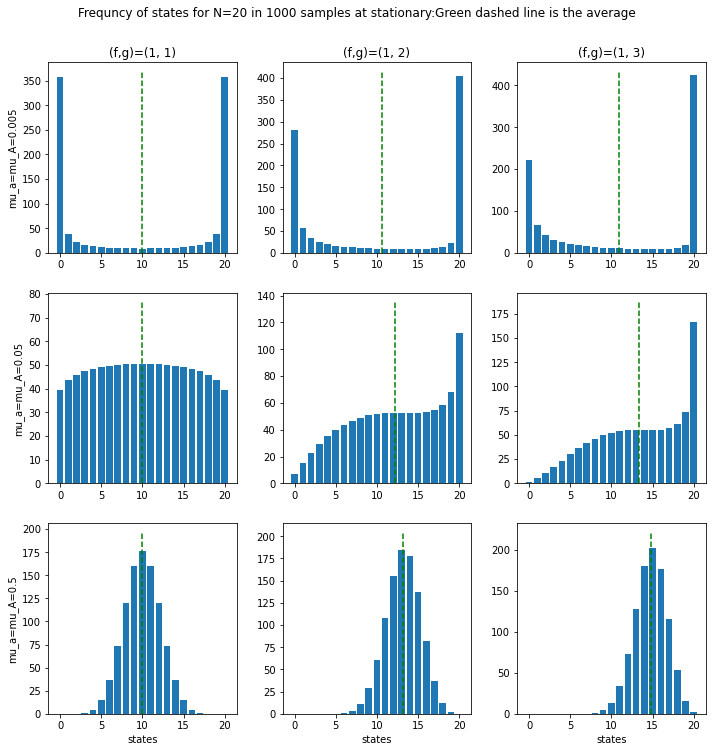

run time=1.04 sec.


In [8]:
start = timeit.default_timer()

# stationary distribution plots
N = 20
samples = 1000
fig, ax = plt.subplots(3,3,figsize=(10,10))

for i,(mu_a, mu_A, n) in enumerate([(0.1/N,0.1/N,50000),\
    (1/N,1/N,20000),(10/N,10/N,5000)]):
    
    for j, (f,g) in enumerate([(1,1),(1,2),(1,3)]):     
    
        P = transition_matrix(N, mu_a, mu_A, f, g)
        steady_state_approx = stationary_distribution(N, mu_a, mu_A, f, g, n)
        frequency = steady_state_approx * samples
        expected_state = np.dot(frequency, np.arange(N+1))/samples
        ax[i,j].bar(np.arange(N+1),frequency)
        ax[i,j].axvline(x=expected_state, ymin=0, ymax=0.95, linestyle='dashed', color ='green')
        ax[i,j].set_ylim([0,max(frequency)+30])
        ax[-1,j].set_xlabel('states')
        ax[i,0].set_ylabel('mu_a=mu_A={}'.format(mu_a))
        ax[0,j].set_title('(f,g)={}'.format((f,g)))    
plt.tight_layout(h_pad=2,w_pad=2)          
plt.suptitle('Frequncy of states for N=20 in 1000 samples at stationary:\
Green dashed line is the average',y=1.04)        
plt.show()

# timing        
end = timeit.default_timer()
print('run time=%1.2f sec.'%(end-start))
